In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
def calc_mean_erp(trial_points, ecog_data):
    # Import data as integers and naming the columns as stated in the assignment 
    new_trial_points = pd.read_csv(trial_points, header=None, names=["start", "peak", "finger"], dtype=int)
    new_ecog_data = pd.read_csv(ecog_data, header=None).squeeze("columns")

    # Initialize the result matrix in the desired size 
    fingers_erp_mean = np.zeros((5, 1201))

    # Iterate over each finger
    for finger in range(1, 6):
        # Filter trials for the current finger
        finger_trials = new_trial_points[new_trial_points["finger"] == finger]

        # Initialize list to store all blocks of brain data
        finger_data_blocks = []

        # Extract blocks of data for each trial
        for _, trial in finger_trials.iterrows():
            start_idx = trial["start"] - 200
            end_idx = trial["start"] + 1000
            if start_idx >= 0 and end_idx < len(new_ecog_data):
                finger_data_blocks.append(new_ecog_data[start_idx:end_idx + 1].values)

        # Compute the average block for the current finger
        if finger_data_blocks:
            finger_data_blocks = np.array(finger_data_blocks, dtype=np.float64)
            fingers_erp_mean[finger - 1, :] = np.mean(finger_data_blocks, axis=0)

    # Plot the averaged brain response for each finger

    time = np.linspace(-200, 1000, 1201)
    plt.figure(figsize=(10, 6))
    # Define pretty colors for the fingers
    colors = ["#87CEFA", "#FF7F50", "#98FB98", "#E6E6FA", "#FF6347"]
    for finger in range(1, 6):
        plt.plot(time, fingers_erp_mean[finger - 1, :], label=f"Finger {finger}", color=colors[finger - 1])
    plt.xlabel("Time (ms)")
    plt.ylabel("Mean Brain Response")
    plt.title("Average Brain Response by Finger Movement")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print and return the result matrix with finger numbers
    print("Fingers ERP Mean Matrix:")
    for i, row in enumerate(fingers_erp_mean, start=1):
        print(f"Finger {i}: {row}")
   # Convert result matrix to DataFrame
    fingers_erp_mean = pd.DataFrame(fingers_erp_mean, index=[f"Finger {i}" for i in range(1, 6)], columns=[f"{i}" for i in range(0, 1201)])
    # Print the result DataFrame
    print("Fingers ERP Mean DataFrame:")
    print(fingers_erp_mean)
    return fingers_erp_mean


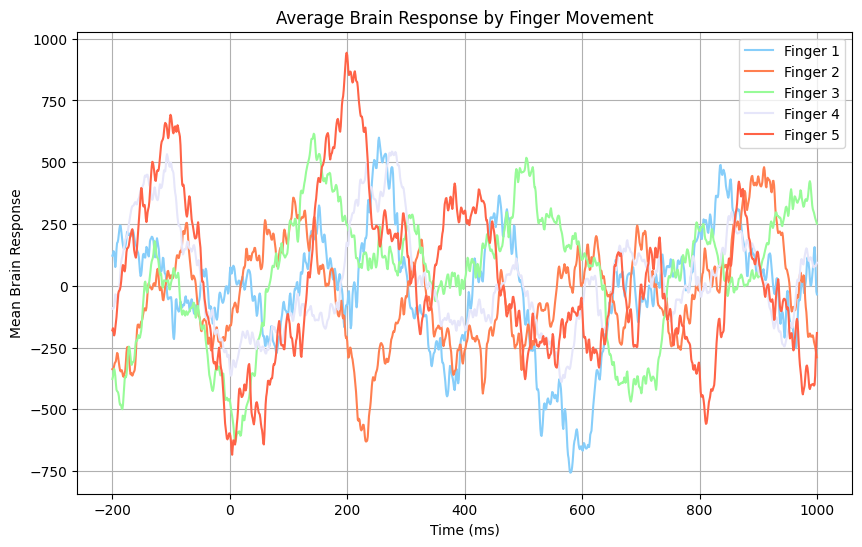

Fingers ERP Mean DataFrame:


In [21]:
fingers_erp_mean = calc_mean_erp(r"C:\Users\User\Downloads\mini_project_2_data\mini_project_2_data\events_file_ordered.csv", r"C:\Users\User\Downloads\mini_project_2_data\mini_project_2_data\brain_data_channel_one.csv")


